In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

#import utils

%matplotlib inline

DATA_FILE = 'data/fire_theft.xls'

## Step 1: read in data from the .xls file


In [54]:
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

n_samples

42

In [55]:
x = data[:,0].reshape(n_samples,1)
y = data[:,1].reshape(n_samples,1)
np.shape(y)

(42, 1)

## Step 2: create placeholders for input X (number of fire) and label Y (number of theft)


In [56]:
X = tf.placeholder(tf.float32, shape=(n_samples, 1), name='X')
Y = tf.placeholder(tf.float32, shape=(n_samples, 1), name='Y')

## Step 3: create weight and bias, initialized to 0


In [57]:
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

## Step 4: build model to predict Y


In [58]:
Y_predicted = X * w + b 

## Step 5: use the square error as the loss function


In [59]:
loss = tf.square(Y - Y_predicted, name='loss')

## Step 6: using gradient descent with learning rate of 0.00001 to minimize loss


In [60]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.00001).minimize(loss)

## Step 7, 8, 9 -> inside tf.session()

#### Step 7: initialize the necessary variables, in this case, w and b
#### Step 8: train the model
#### Step 9: output the values of w and b


In [61]:
with tf.Session() as sess:
    
    # Step 7: initialize the necessary variables, in this case, w and b
    
    sess.run(tf.global_variables_initializer()) 

    # Step 8: train the model
    
    for i in range(100): # train the model 100 epochs
        total_loss = 0
        
        # Session runs train_op and fetch values of loss
        _, l = sess.run([optimizer, loss], feed_dict={X: x, Y: y}) 
        total_loss =np.sum(l)
        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    
    # Step 9: output the values of w and b
    
    w, b = sess.run([w, b]) 

Epoch 0: 1651.6666666666667
Epoch 1: 1200.428199404762
Epoch 2: 920.5723586309524
Epoch 3: 746.9984188988095
Epoch 4: 639.3341703869048
Epoch 5: 572.5432477678571
Epoch 6: 531.099841889881
Epoch 7: 505.3754185267857
Epoch 8: 489.3989025297619
Epoch 9: 479.4677269345238
Epoch 10: 473.28538876488096
Epoch 11: 469.4278273809524
Epoch 12: 467.0121837797619
Epoch 13: 465.4905598958333
Epoch 14: 464.5233909970238
Epoch 15: 463.90015811011904
Epoch 16: 463.49009486607144
Epoch 17: 463.2124255952381
Epoch 18: 463.0166945684524
Epoch 19: 462.87183779761904
Epoch 20: 462.7586960565476
Epoch 21: 462.6650855654762
Epoch 22: 462.5835658482143
Epoch 23: 462.5096726190476
Epoch 24: 462.4404761904762
Epoch 25: 462.37425595238096
Epoch 26: 462.30980282738096
Epoch 27: 462.2464657738095
Epoch 28: 462.18387276785717
Epoch 29: 462.12179129464283
Epoch 30: 462.0598958333333
Epoch 31: 461.9983723958333
Epoch 32: 461.9368954613095
Epoch 33: 461.8755580357143
Epoch 34: 461.81431361607144
Epoch 35: 461.7531156

In [62]:
print(b)
print(w)


0.612963
2.13865


# Plot the results


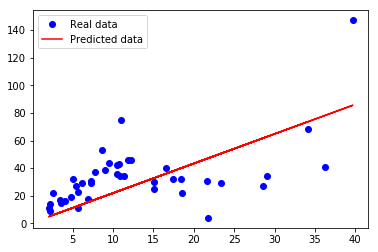

In [63]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()

## Compare with the Stochastic Gradient Descent Version

SGD with **100 epoch** and **learning rate = .00001**


BGD with **100 epoch** and **learning rate = .00001**


|                  | **bias**(b)   | **Weight**(w) | **Cost**         |
| ---------------- |:-------------:| -------------:| ----------------:|
| **SGD**          | 0.611998      | 2.13033       | 463.52           |
| **BGD**          | 0.612963      | 2.13865       | 457.91           |


